# STOCK  PRICE  PREDICTION

In [10]:
# Import the required libraries -->
import math 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
# import pandas_datareader as web

%matplotlib inline
plt.style.use('fivethirtyeight')

In [13]:
import pandas_datareader as web

In [24]:
#  Get the stodk data :

data = web.DataReader('AAPL' , data_source = 'yahoo', start='2012-01-01' , end='2021-01-01')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765113
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898555
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878098
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802322
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480591
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676666


In [25]:
# just get the info of the data :
data.shape

(2265, 6)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2012-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2265 non-null   float64
 1   Low        2265 non-null   float64
 2   Open       2265 non-null   float64
 3   Close      2265 non-null   float64
 4   Volume     2265 non-null   float64
 5   Adj Close  2265 non-null   float64
dtypes: float64(6)
memory usage: 123.9 KB


In [27]:
# check if there are any null vals or not :
print(data.isnull().sum())

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [28]:
# Well the data is loaded accurately 

# Now with this clean data we are going to visualize it to get idea or the pattern about the future predictions.

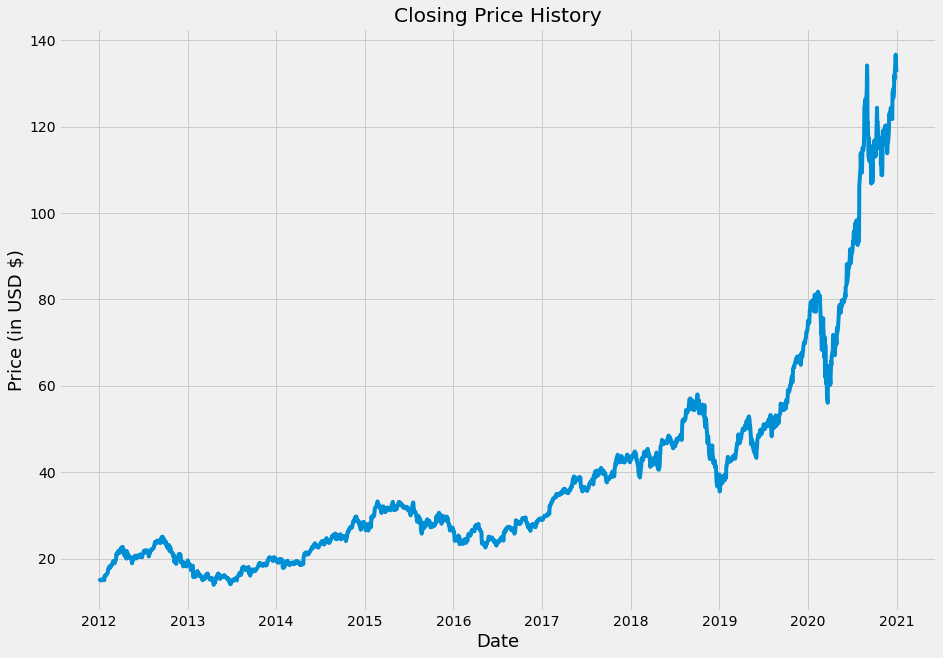

In [62]:
# Visualise the closing price :
plt.figure(figsize=(14,10))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Price (in USD $)' , fontsize = 18)
plt.show()

In [37]:
# now we have to take this close col as the new dataframe :
data_1 = data.filter(['Close'])
data_array = data_1.values  # convert into numpy array
data_array

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [134.86999512],
       [133.72000122],
       [132.69000244]])

In [39]:
# Now get the no. of rows to train the model on :
train_data_len = math.ceil(len(data_array) * .8)
train_data_len

1812

In [40]:
# Scaling data :
# Scaling data is an advantages for the data preprocessing and data transformions , normalizations to the input data before
# it pass to the neural network.

scaler = MinMaxScaler(feature_range = (0,1))
# the fit_transform basically computes the min and max values to be used for the scaling
scaled_data = scaler.fit_transform(data_array)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [41]:
# now we will create the training (scaled) data :
train_data = scaled_data[0:train_data_len, :]

In [43]:
# split the train and test data : ( for last 100 days)
x_train = [] 
y_train = []

for i in range(100 , len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 101:
        print(x_train)
        print(y_train)

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619,
       0.06381827, 0.06081838, 0.06637007, 0.06948053, 0.06802277,
       0.07074916, 0.07149113, 0.06922448, 0.06857271, 0.06757468,
       0.06247108, 0.05516776, 0.06377171, 0.063376  , 0.0572

In [44]:
# convert thsi train data to np arrays :
x_train , y_train = np.array(x_train) , np.array(y_train)



In [47]:
# rehape the data :
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1712, 100, 1)

In [53]:
# Now its time to build the model (LSTM) :
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
# compile the model :
model.compile(optimizer='adam' , loss='mean_squared_error')

In [55]:
# Train the model :
model.fit(x_train, y_train,  batch_size=1, epochs=1)


1712/1712 [==============================] - 82s 42ms/step - loss: 2.9031e-04


In [58]:
# create the test data :
# creating new array containing ths scaled values fro 1712 to 2272 :
test_data = scaled_data[train_data_len-100: , :]

# just create the x_test and y_test :
x_test = []
y_test = data_array[train_data_len: , :]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [59]:
# to np array :
x_test = np.array(x_test)

# reshape :
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1],1))

In [60]:
# Now get the predicted values :
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

15/15 [==============================] - 2s 28ms/step


In [61]:
# Get the root mean squared error (RMSE) :
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
print('root mean squared error (RMSE) is : ' , rmse)

root mean squared error (RMSE) is :  2.1875275281354556


<ipython-input-67-3f4f08109ca7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = y_pred


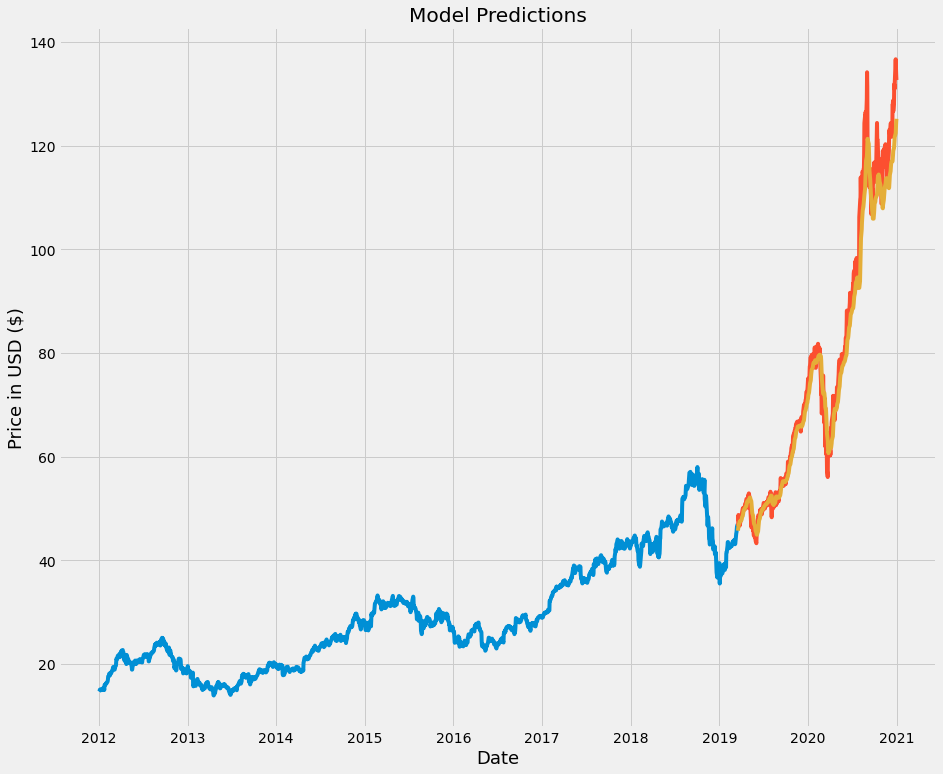

In [67]:
# now plot our predicted results :
train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = y_pred

# visualize the data :
plt.figure(figsize=(14,12))
plt.title('Model Predictions')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Price in USD ($)' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'predictions']])
plt.show()